# Solving problems with Stochastic Gradient Descent (SGD)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The goal of this part of the assignmentment is to get familiar with stochastic gradient descent. Specifically, we'll be looking at trying to predict the output of a certain function
```
y = f(x)
```
Our goal is to predict the output of `f` given input `x`. To learn, we'll be given a bunch of input-output examples,
```
(x_1, f(x_1))
(x_2, f(x_2))
...
(x_N, f(x_N))

```
In this case, `f(x) = x*x` is a simple quadratic function, but the techniques we develop here are broadly applicable to functions that are much more complicated and whose analytic formula may be unknown or intractable to compute.

## Least squares

We'll start by building `f(x) = x*x` function in python

In [2]:
def square(array_in):
    """
    Computes the element-wise square of a scalar or array.
    :param array_in (numpy array like): The argument to compute the square of.
    :return (numpy array like): Element-wise squared input.
    """
    return np.power(array_in, 2)

Next, we'll generate some random input-output data for this model

In [3]:
n_samples = 1024
x = np.random.normal(0.0, 0.5, n_samples)
y = 2.5 * x + 2.25 + np.random.normal(0.0, 0.05, n_samples)

Remember that the goal is to learn a function that predicts `y` given `x`, assuming that we don't know the true function `f`. The first thing that we'll try a linear model. So we'll predict `y` according the equation `y_pred = ax + b`. This model has two parameters, `a` and `b`.

Now how should we measure how "good" our predictions of `y` are? A common approach is to use the squared error, which simply squares the difference between the true `y` value and our predicted `y` value. We define our _loss_ as the average of these values, called the mean squared error (AKA least squares loss).

All together, the following code computes the least squares loss for simple two-parameter, linear model on our generate data.

In [4]:
def loss(a, b):
    """
    Definition of the mean squared error function.
    :param a (scalar): Slope of the linear model.
    :param b (scalar): Offset of the linear model.
    :return (scalar): Mean squared error.
    """
    y_pred = a * x + b
    error = y - y_pred
    return np.mean(square(error))

For example, to see how good our model is for a specific set of `a` and `b` values, we can run

In [5]:
loss(0.01, 0.4)

4.9469742659438243

Ideally, we would like to decrease this loss as much as possible. Let's visualize how different `a` and `b` values affect the loss function.

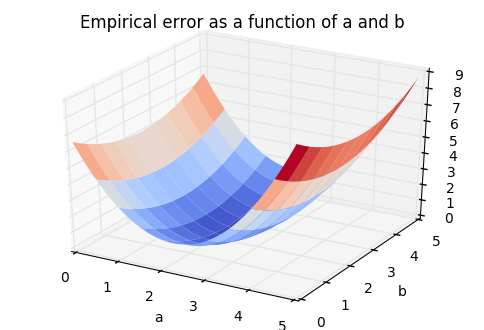

In [6]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

a_grid = np.arange(0.0, 5.0, 0.05)
b_grid = np.arange(0.0, 5.0, 0.05)
error_plot = np.asanyarray([[loss(a, b) 
                             for b in b_grid]
                            for a in a_grid])
A, B = np.meshgrid(a_grid, b_grid)

fig = plt.figure()
ax = fig.gca(projection='3d')

im = ax.plot_surface(A, B, error_plot, cmap=cm.coolwarm, linewidth=0)

plt.title('Empirical error as a function of a and b')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

At any point in this 2D space, we can compute the sensitivity of the error with respect to the parameters a and b. This is called the gradient and is defined as the vector [dloss / da, dloss / db]. You can think of the gradient as a generalization of derivatives to more than one input dimension.

Write down the analytical expression for loss(a,b) and derive the corresponding gradient:

### YOUR ANSWER HERE
Write a function to compute the gradient as a pair of outpus

In [7]:
def loss_grad(a, b):
    """
    Gradient of the mean squared error loss function.
    :param a (scalar): Slope of the linear model.
    :param b (scalar): Offset of the linear model.
    :return (tuple):
        - first element (scalar): Derivative of the loss function w.r.t a.
        - second element (scalar): Derivative of the loss function w.r.t. b.
    """
    #
    #  Your code here
    #

    #return (something, something)
    
    #
    #  Answer
    #
    y_pred = a * x + b
    error = y - y_pred
    return (-2.0 * np.mean(error * x), -2.0 * np.mean(error))

## Gradient Descent

The minizing (a, b) pair is the lowest point we can find on the 3d surface above. The most direct way of getting to the point is to follow a stepest descent approach.

For a continuously differentiable function, the direction of steepest descent at a point is exactly given by the gradient at then point. (Remember that the gradient is a function of the input, i.e. `a` and `b` in our example).

Gradient descent works as follows:
1. Start a point `(a[0], b[0])`
2. Compute the gradient of the loss function at the point: `(g[0], g[1])`
3. Create a new point `(a[1] = a[0] - epsilon * g_0, b[1] = b[0] - epsilon * g_1)`
4. Repeat steps 1-3 until some stopping criterion

Here, epsilon is our learning rate. Note that `g[0]` is the partial derivative of the loss function with respect to its first input and `g[1]` its partial derivative with respect to its second input.

### YOUR ANSWER HERE
Update the old parameters a and b with a pre-computed gradient.

In [8]:
def new_params(a, b, learning_rate, gradient):
    """
    Return updated values for a and b following the opposite direction to the gradient.
    :param a (scalar): slope of the linear model.
    :param b (scalar): offset of the linear model.
    :learning_rate (scalar): gradient multiplyer in the update.
    :gradient ((scalar, scalar)): computed gradient.
    :return (tuple):
        - first element (scalar): Updated slope.
        - second element (scalar): Updated offset.
    """
    #
    #   Your code here
    #

    #return (something, something)
    
    #
    #   Answer
    #
    return (a - learning_rate * gradient[0], b - learning_rate * gradient[1])

### YOUR ANSWER HERE

Code the gradient descent algorithm starting a parameter value (a_init, b_init).

The stopping criterion is squared_l2_norm(gradient) < precision * (1 + abs(loss)) or when `MAX_STEPS` have been taken.

In [9]:
def gradient_descent(a_init, b_init, learning_rate, 
                     loss_eval_fct, gradient_eval_fct, 
                     precision=1e-4, MAX_STEPS=10000):
    """
    :param a_init (scalar): Initial value of `a`.
    :param b_init (scalar): Initial value of `b`.
    :param learning_rate (scalar): Learning rate for gradient descent.
    :param loss_eval_fct ((scalar, scalar) -> scalar). Give `x`, return `f(x)`
    :param gradient_eval_fct ((scalar, scalar) -> (scalar, scalar)): Give `x`, return the gradient of `f` at `x`.
    :param precision (scalar): precision desired.
    :param MAX_STEPS (int): number of steps before the descent is stopped to avoid an infinite loop.
    :return: A tuple
        - First element (scalar): final value for a.
        - Second element (scalar): final value for b.
        - Third element (int): number of steps used to converge.
        - Fourth element (list): trajectory, a list where `trajectory[i]` is a tuple of the (a, b) values at step `i`.
        - Firth element (list): losses, a list where `losses[i]` is the loss at step `i`.
    """
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        gradient = gradient_eval_fct(a, b)
        
        a -= learning_rate * gradient[0]
        b -= learning_rate * gradient[1]
        
        new_loss = loss_eval_fct(a, b)
        converged = np.sum(np.array(gradient)**2) < precision * (1 + np.abs(new_loss))
        
        old_loss = new_loss
        
        trajectory.append((a, b))
        losses.append(old_loss)
        
        if n_steps > MAX_STEPS:
            print('Warning: gradient descent did not converge')
            break
        
    return a, b, n_steps, trajectory, losses

We now apply the gradient descent algorithm to our initial least squares problem.

Optimum found (2.493, 2.252) in 47 steps of Gradient Descent.


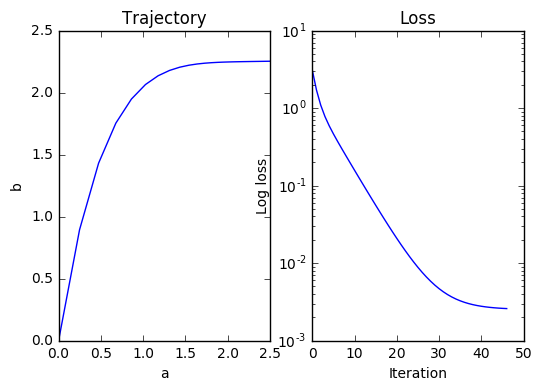

In [10]:
a_opt, b_opt, n_steps, trajectory, losses = gradient_descent(0.0, 0.0, 2e-1, loss, loss_grad)

print('Optimum found (%.3f, %.3f) in %d steps of Gradient Descent.' % (a_opt, b_opt, n_steps))

plt.subplot(121)
plt.plot([param[0] for param in trajectory], [param[1] for param in trajectory])
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Log loss')
plt.yscale('log')

plt.show()

a) What is the sensitivity of the run time with respect to your choice of initial values?

b) What is the sensitivity of the run time with respect to the precision?

c) What is the sensitivity of the run time with respect to the learning rate? 

d) What happens if the learning rate is very high? What happens if it's very low?

### YOUR ANSWERS HERE:

a)

b)

c)

d)

#### Answers:

a) Proportional to the log of the distance between initial values and optimum.

b) Proportional to the log of the precision.

c) It depends unfortunately...

d) If the learning rate is too high the algorithm diverges, it it's too low it takes more time to converge.

# Considering a random gradient

Instead of computing our gradient holistically, let us only focus on a few (x, y) pairs at the time.

The loss function we consider here is an empirical average obtained from hypothetically independent identically distributed samples. By linearity of the gradient, the gradient function here is also an average as well.

Using the Law of Large Numbers we can approximate this sum by a few samples randomly selected. This smaller collection of samples is called a batch (or "minibatch") and the number of samples we choose to represent our data set at each of step of the gradient descent.

The key insight here is that for the first steps of the gradient descent it is not very informative to carefully examine the value of the contributions to the gradient from each sample. We are most likely far from the optimum we seek anyway and therefore an imperfect vector indicating an approximation of the steepest descent direct is enough to get us closer to the optimum.

We just follow Gandalf's recommendation in the Moria mine:

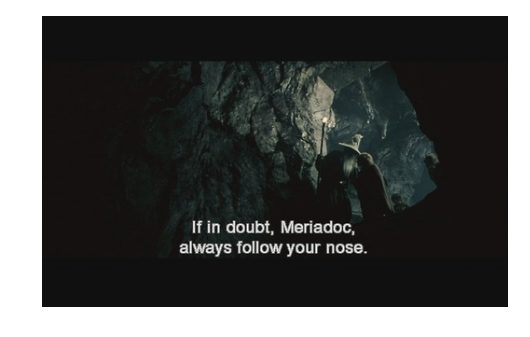

In [11]:
def plot_img_from_url(url):
    from PIL import Image
    import cStringIO
    import urllib2
    im = Image.open(cStringIO.StringIO(urllib2.urlopen(url).read()))
    plt.imshow(im, origin='upper')
    plt.axis('off')
    
plot_img_from_url('http://data.whicdn.com/images/53685638/large.jpg')

### YOUR ANSWER HERE

Write a random approximation of the gradient obtained by only selecting batch_size distinct samples uniformly at randnom.

First, we shuffle the data set which can help enforce the iid assumption about our samples with datasets that may have similar data points clustered together.

In [12]:
permutation = np.random.choice(np.arange(n_samples), n_samples)

x = x[permutation]
y = y[permutation]

Here is a function that selects batch_size distinct samples of corresponding x, y observations.

In [13]:
def collect_samples(offset, batch_size):
    """
    Collect batch_size samples from the data set starting at offset.
    Wrap if necessary.
    :param offset (int): where the collection of samples starts in the dataset.
    :param batch_size (int): how many samples are collected.
    :return ((array like, array like)):
        - First element (numpy array like): batch of values for x.
        - Second element (numpy array like): batch of values for y corresponding to those in the batch for x.
    """
    selection = np.arange(offset, offset + batch_size) % n_samples
    return x[selection], y[selection]

Now write a similar function that estimates the gradient for a pair of parameter values as an empirical average over the elements of the batch.

In [14]:
def sampled_loss_grad(x_batch, y_batch, a, b):
    """
    Compute the mean squared error for the collection of samples collected from the data set.
    :param x_batch (numpy array like): collection of values for x.
    :param y_batch (numpy array like): collection of values for y corresponding to the values for x in x_batch.
    :param a (scalar): slope of the linear model.
    :param b (scalar): offset of the linear model.
    :return (tuple):
        - First element (scalar): derivative of the mean squared error on the sub-set of samples w.r.t. a.
        - Second element (scalar): derivative of the mean squared error on the sub-set of samples w.r.t. b.
    """
    #
    #     Your code here
    #
    
    # return pair of scalars
    
    #
    #     Answer
    #
    y_pred_batch = a * x_batch + b
    error_batch = y_batch - y_pred_batch
    return (-2.0 * np.mean(error_batch * x_batch), -2.0 * np.mean(error_batch))

## Stochastic Gradient Descent

We now re-implement the gradient descent algorithm but with two major modifications:
1. We use an approximate evaluation of the gradient of the loss function based on sample collections of length batch_size.
2. We use the loss evaluated over the entire dataset as a stopping criterion, but we only compute it every evaluate_loss_every iterations. We stop when don't improve the global loss more than the prescribed precision.

In [15]:
def stochastic_gradient_descent(a_init, b_init, learning_rate, 
                                loss_eval_fct, sampled_gradient_eval_fct,
                                batch_size=8,
                                evaluate_loss_every=4, precision=1e-5, MAX_STEPS=10000):
    """
    :param a_init (scalar): Initial value of `a`.
    :param b_init (scalar): Initial value of `b`.
    :param learning_rate (scalar): Learning rate for gradient descent.
    :param loss_eval_fct ((scalar, scalar) -> scalar). Give `a,b`, return `f(a,b)`
    :param sampled_gradient_eval_fct ((array, array, scalar, scalar) -> (scalar, scalar)): Approx. grad. of `f`.
    :param batch_size (int): number of elements used to compute the sampled gradient.
    :param evaluate_loss_every (int): only evaluate on the data set evaluate_loss_every steps.
    :param precision (scalar): precision desired.
    :param MAX_STEPS (int): number of steps before the descent is stoped to avoid an infinite loop.
    :return: A tuple
        - First element (scalar): final value for a.
        - Second element (scalar): final value for b.
        - Third element (int): number of steps used to converge.
        - Fourth element (list): trajectory, a list where `trajectory[i]` is a tuple of the (a, b) values at step `i`.
        - Firth element (list): losses, a list where `losses[i]` is the loss at step `i`.
    """
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        x_batch, y_batch = collect_samples(n_steps * batch_size, batch_size)
        
        gradient_estimate = sampled_gradient_eval_fct(x_batch, y_batch, a, b)
        
        a -= learning_rate * gradient_estimate[0]
        b -= learning_rate * gradient_estimate[1]
        
        if n_steps % evaluate_loss_every == 0:        
            new_loss = loss_eval_fct(a, b)
            converged = np.abs(new_loss - old_loss) < precision
        
            old_loss = new_loss
            losses.append(old_loss)
        
        trajectory.append((a, b))
        
        if n_steps > MAX_STEPS:
            print('Warning: gradient descent did not converge')
            break
        
    return a, b, n_steps, trajectory, losses

We now apply the stochastic gradient descent algorithm to our initial least squares problem.

Optimum found (2.511, 2.255) in 68 steps of Stochatic gradient Descent.


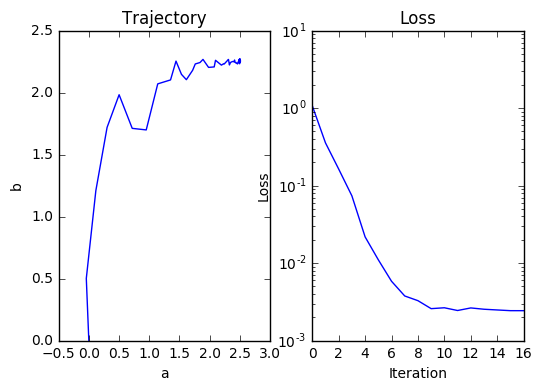

In [16]:
a_opt, b_opt, n_steps, trajectory, losses = stochastic_gradient_descent(0.0, 0.0, 2e-1, 
                                                                        loss, sampled_loss_grad)

print('Optimum found (%.3f, %.3f) in %d steps of Stochatic gradient Descent.' % (a_opt, b_opt, n_steps))

plt.subplot(121)
plt.plot([param[0] for param in trajectory], [param[1] for param in trajectory])
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')

plt.show()

a) Compared to Gradient Descent, do we compute more or less iterations?

b) Compared to Gradient Descent, do we increase or decrease the run time?

c) What is the impact of the batch_size parameter on the smoothness of the trajectory? On the number of steps required to converge?

d) Give multiple tries to the algorithm, does the loss always decrease?

e) What is is the influence of the learning rate parameter?

### YOUR ANSWERS HERE:

a)

b)

c)

d)

e)

#### Answers:

a) More iterations.

b) More iterations that take less time, so faster.

c) The higher the batch size, the less variance we have in our estimate of the gradient, the smoother the trajectory. We take fewer (more expensive in time complexity) steps to converge.

d) The loss does not systematically descrease. This algorithm should be thought of as the "Stochastc Gradient Method".

e) With a higher learning rate we decrease the loss faster in the beginning but then it takes more time to stabilize and may bounce around the minimal loss. We may also simply diverge with too high a learning rate.

## Decaying learning rate

A constant learning rate is enough to get close to the optimum rapidly. However at the end of the descent we get bouncing around the optimum without being able to get as close as want to it.

To be able to achieve this, we want a series of learning rates that sums to infinity and whose sum of squares is finite.

Let's use alpha/(1 + t) as a learning rate.

In [17]:
def stochastic_gradient_descent_decaying_rate(a_init, b_init, initial_learning_rate, 
                                              loss_eval_fct, sampled_gradient_eval_fct,
                                              batch_size=8,
                                              evaluate_loss_every=4, precision=1e-5, MAX_STEPS=10000):
    """
    :param a_init (scalar): Initial value of `a`.
    :param b_init (scalar): Initial value of `b`.
    :param initial_learning_rate (scalar): Initial learning rate for gradient descent.
    :param loss_eval_fct ((scalar, scalar) -> scalar). Give `a,b`, return `f(a,b)`
    :param sampled_gradient_eval_fct ((array, array, scalar, scalar) -> (scalar, scalar)): Approx. grad. of `f`.
    :param batch_size (int): number of elements used to compute the sampled gradient.
    :param evaluate_loss_every (int): only evaluate on the data set evaluate_loss_every steps.
    :param precision (scalar): precision desired.
    :param MAX_STEPS (int): number of steps before the descent is stoped to avoid an infinite loop.
    :return: A tuple
        - First element (scalar): final value for a.
        - Second element (scalar): final value for b.
        - Third element (int): number of steps used to converge.
        - Fourth element (list): trajectory, a list where `trajectory[i]` is a tuple of the (a, b) values at step `i`.
        - Firth element (list): losses, a list where `losses[i]` is the loss at step `i`.
    """
    #
    #    Your code here
    #
    
    #return (a_opt, b_opt, n_steps, trajectory, losses)
    
    #
    #    Answer
    #
    old_loss = loss_eval_fct(a_init, b_init)
    converged = False
    a = a_init
    b = b_init
    
    n_steps = 0
    trajectory = [(a_init, b_init)]
    losses = []
    
    while not converged:
        n_steps += 1
        
        x_batch, y_batch = collect_samples(n_steps * batch_size, batch_size)
        
        gradient_estimate = sampled_gradient_eval_fct(x_batch, y_batch, a, b)
        
        a -= initial_learning_rate / n_steps * gradient_estimate[0]
        b -= initial_learning_rate / n_steps * gradient_estimate[1]
        
        if n_steps % evaluate_loss_every == 0:        
            new_loss = loss_eval_fct(a, b)
            converged = np.abs(new_loss - old_loss) < precision
        
            old_loss = new_loss
            losses.append(old_loss)
        
        trajectory.append((a, b))
        
        if n_steps > MAX_STEPS:
            print('Warning: gradient descent did not converge')
            break
        
    return a, b, n_steps, trajectory, losses

Optimum found (0.842, 1.853) in 10001 steps of Stochatic gradient Descent.


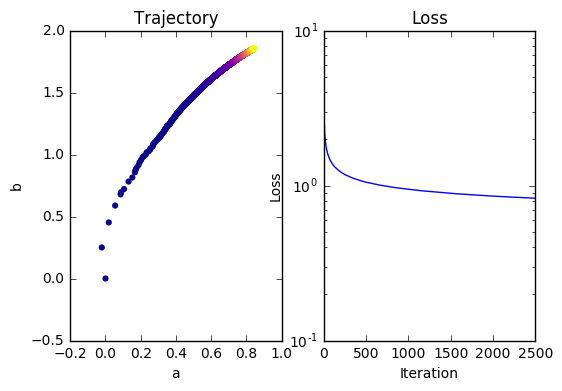

In [18]:
a_opt, b_opt, n_steps, trajectory, losses = stochastic_gradient_descent_decaying_rate(0.0, 0.0, 0.1, 
                                                                                      loss, sampled_loss_grad)

print('Optimum found (%.3f, %.3f) in %d steps of Stochatic gradient Descent.' % (a_opt, b_opt, n_steps))

plt.subplot(121)
trajectory=trajectory
colors = np.linspace(0.0, 1.0, len(trajectory))
plt.scatter([param[0] for param in trajectory], [param[1] for param in trajectory],
            c=colors, cmap='plasma', edgecolors='none')
plt.title('Trajectory')
plt.xlabel('a')
plt.ylabel('b')

plt.subplot(122)
plt.plot(losses)
plt.title('Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.yscale('log')

plt.show()

a) Why do we want our sum of steps to be infinite in size if an infinite number of steps occur?

b) Why do we want our sum of squared steps to be infinite in size if an infinite number of steps occur?

### YOUR ANSWERS HERE:

a)

b)

#### Answers:

a) So that if the optimum is far can reach it.

b) So that the variance associated with the accumulation of errors in the gradient estimation is bounded.